In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converting string representation of list to actual list (I prefer defining a function for this, but lambda works too)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
datajobsUK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

In [5]:
datajobsUK = datajobsUK.dropna(subset=['salary_year_avg'])

datajobsUK_exploded = datajobsUK.explode('job_skills')

datajobsUK_exploded[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [17]:
datajobsUK_skills = datajobsUK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

datajobsUK_skills = datajobsUK_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

datajobsUK_skills.head(10)

,skill_count,median_salary
job_skills,,
python,50,89885.0
sql,46,97985.0
aws,22,88128.0
r,18,113360.5
tableau,15,111500.0
excel,11,80850.0
gcp,9,131867.0
looker,9,113500.0
pandas,9,88128.0


In [22]:
DS_UK_Jobs = len(datajobsUK)

datajobsUK_skills["skill_percent"] = datajobsUK_skills["skill_count"] / DS_UK_Jobs * 100

skill_percent = 8

datajobsUK_skills.head(5)

top_skills = datajobsUK_skills[datajobsUK_skills["skill_percent"] > skill_percent]

top_skills



,skill_count,median_salary,skill_percent
job_skills,,,
python,50,89885.0,66.666667
sql,46,97985.0,61.333333
aws,22,88128.0,29.333333
r,18,113360.5,24.000000
tableau,15,111500.0,20.000000
excel,11,80850.0,14.666667
gcp,9,131867.0,12.000000
looker,9,113500.0,12.000000
pandas,9,88128.0,12.000000


In [29]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

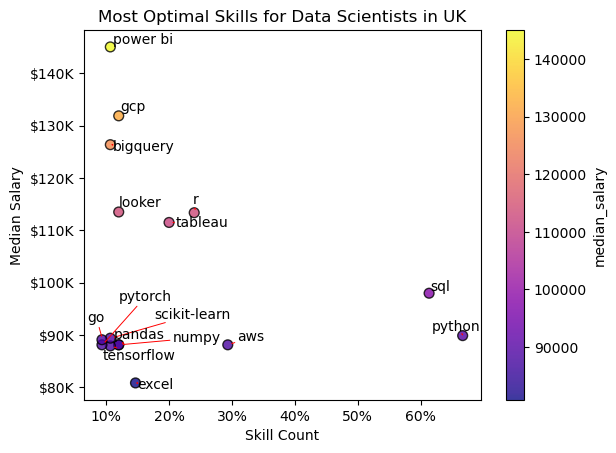

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [ ]:
texts = []
sns.scatterplot(data= top_skills, x = 'skill_percent', y = 'median_salary', c="median_salary",              # color based on median salary
    cmap="plasma",                 # choose a color map (e.g. viridis, plasma, coolwarm)
    s=50,                          # size of points
    alpha=0.8,                      # transparency
    edgecolor="k")
plt.title("Most Optimal Skills for Data Scientists in UK")
plt.xlabel("Skill Count")
plt.ylabel("Median Salary")


for i, txt in enumerate(top_skills.index):
    texts.append(plt.text(top_skills["skill_percent"].iloc[i] + 0.1, top_skills["median_salary"].iloc[i] + 0.1, txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color= 'r', lw=0.7))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()
plt.tight_layout

In [34]:
import matplotlib


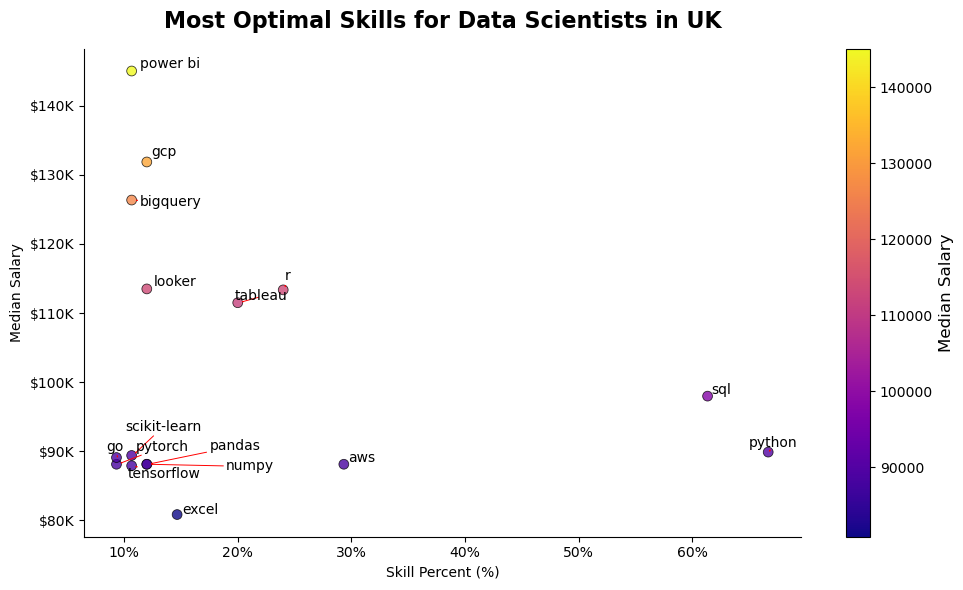

In [41]:
#Wanted to try using seaborn with more control over the figure and axes

fig, ax = plt.subplots(figsize=(10,6))  # create figure & axes

# Scatter plot using hue for continuous coloring
scatter = sns.scatterplot(
    data=top_skills,
    x='skill_percent',
    y='median_salary',
    hue='median_salary',        # continuous color
    palette='plasma',           # colormap
    s=50,
    alpha=0.8,
    edgecolor='k',
    ax=ax,                      # <-- pass axes explicitly
    legend=False                # hide automatic legend
)
sns.despine()
# Add colorbar with custom label
norm = matplotlib.colors.Normalize(
    vmin=top_skills['median_salary'].min(),
    vmax=top_skills['median_salary'].max()
)
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)   # <-- attach to the correct axes
cbar.set_label("Median Salary", fontsize=12)

# Add text labels
texts = []
for i, txt in enumerate(top_skills.index):
    texts.append(
        ax.text(
            top_skills["skill_percent"].iloc[i] + 0.1,
            top_skills["median_salary"].iloc[i] + 0.1,
            txt
        )
    )
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.7))

# Format axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Labels & title
ax.set_title("Most Optimal Skills for Data Scientists in UK", fontsize=16, pad=15,  weight='bold')
ax.set_xlabel("Skill Percent (%)")
ax.set_ylabel("Median Salary")

plt.tight_layout()
plt.show()